# **Necessary libraries for data processing and building a neural network Model**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# **Load your dataset**

In [5]:
# Load your dataset
# Assuming 'df' is your DataFrame with columns: 'Id', 'Tweet', 'Emotion', 'Intensity', and 'clean_tweet'
df = pd.read_csv('/content/drive/MyDrive/emoint/task.csv')
df.head()

,Id,Tweet,Emotion,Intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
7092,41528,Why does Candice constantly pout #GBBO 💄😒,sadness,0.396
7093,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness,0.604
7094,41530,"@AceOperative789 no pull him afew weeks ago, s...",sadness,0.479
7095,41531,I'm buying art supplies and I'm debating how s...,sadness,0.375


# **Preprocessing**

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
# Data preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

text="How the fu*k! Who the heck! moved my fridge!.....	"
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing, removing punctuation, and removing stopwords
    clean_tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Visualization**

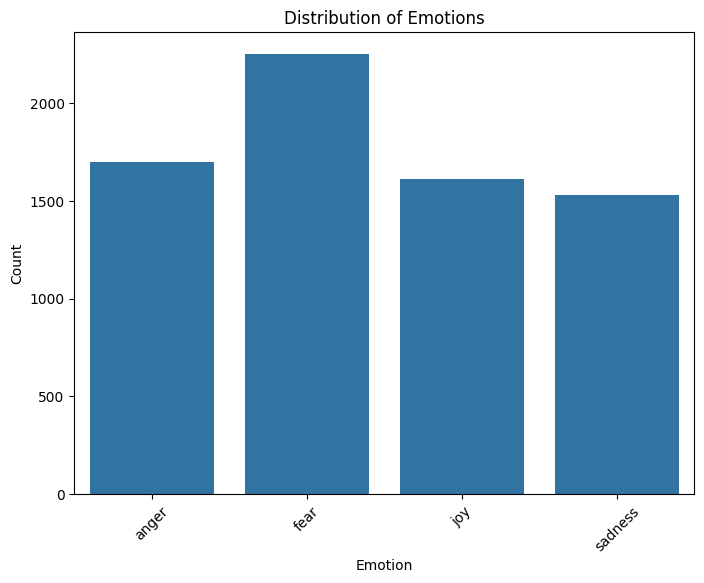

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Emotions
plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

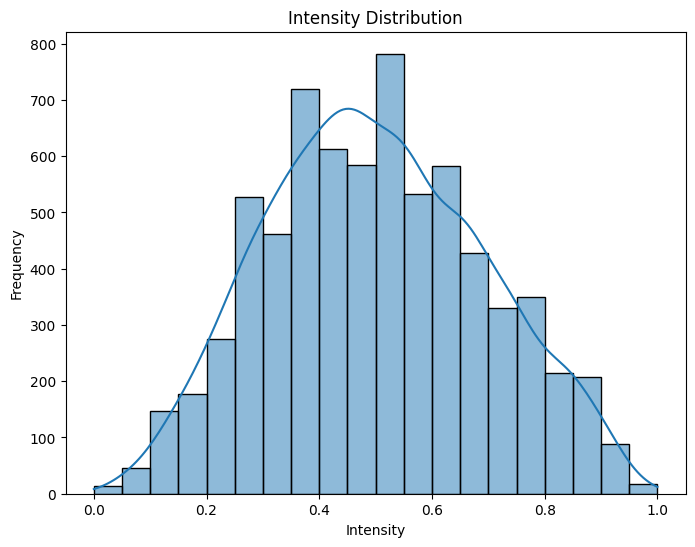

In [15]:
# Intensity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Intensity'], bins=20, kde=True)
plt.title('Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

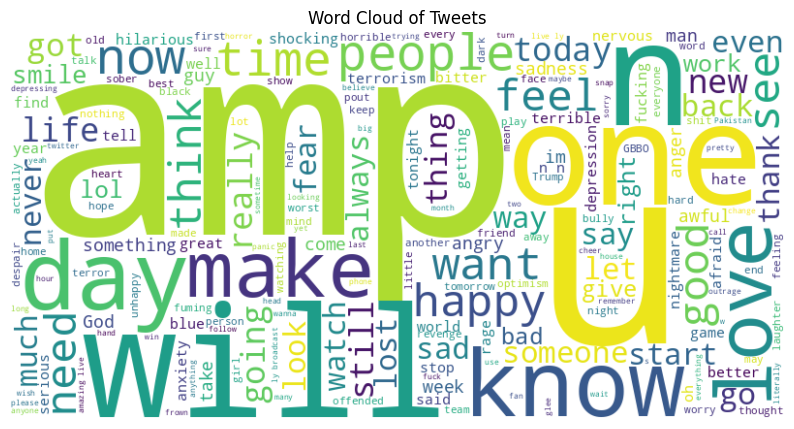

In [16]:
# Word Cloud
text = ' '.join(df['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


<ipython-input-17-0751ed7fdca1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


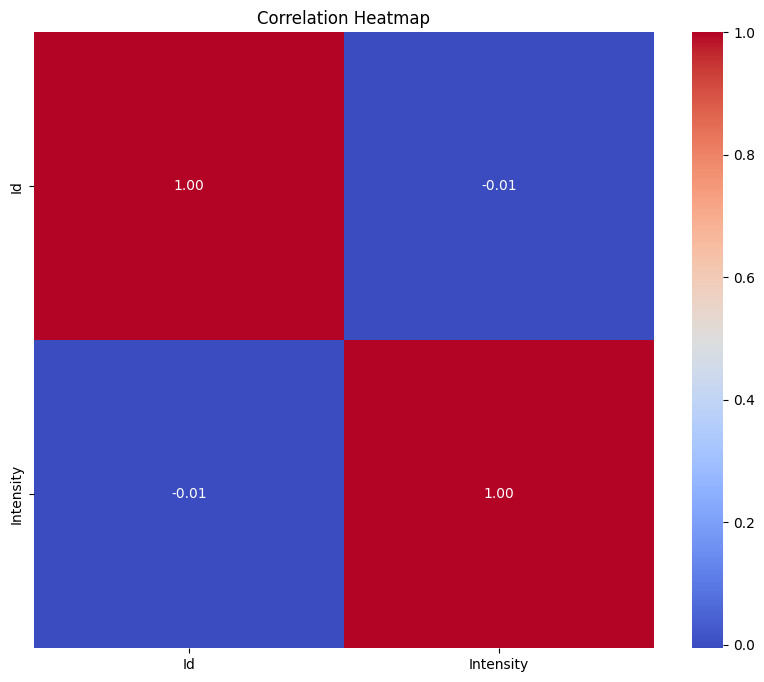

In [17]:
# Correlation Heatmap (assuming you have numerical features)
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Prepare text data before training**

In [7]:
df['Tweet']=df['Tweet'].apply(preprocess_text)

# **Test Data & Train Data**

In [18]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Tweet'])
X = tokenizer.texts_to_sequences(df['Tweet'])
X = pad_sequences(X)

# One-hot encode 'Emotion' column
y = pd.get_dummies(df['Emotion'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **DL Model for Emotion Classification**

In [9]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=len(y.columns), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
160/160 [==============================] - 14s 68ms/step - loss: 1.1374 - accuracy: 0.5034 - val_loss: 0.6817 - val_accuracy: 0.7377
Epoch 2/10
160/160 [==============================] - 9s 58ms/step - loss: 0.2954 - accuracy: 0.9107 - val_loss: 0.3951 - val_accuracy: 0.8627
Epoch 3/10
160/160 [==============================] - 9s 58ms/step - loss: 0.1260 - accuracy: 0.9589 - val_loss: 0.4131 - val_accuracy: 0.8680
Epoch 4/10
160/160 [==============================] - 10s 62ms/step - loss: 0.0937 - accuracy: 0.9648 - val_loss: 0.4182 - val_accuracy: 0.8732
Epoch 5/10
160/160 [==============================] - 10s 60ms/step - loss: 0.0716 - accuracy: 0.9681 - val_loss: 0.4452 - val_accuracy: 0.8803
Epoch 6/10
160/160 [==============================] - 8s 53ms/step - loss: 0.0671 - accuracy: 0.9706 - val_loss: 0.4422 - val_accuracy: 0.8732
Epoch 7/10
160/160 [==============================] - 10s 65ms/step - loss: 0.0592 - accuracy: 0.9726 - val_loss: 0.4453 - val_accuracy: 0.

# **Evaluating Model**

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

45/45 [==============================] - 0s 6ms/step - loss: 0.5061 - accuracy: 0.8535
Test Loss: 0.5060662031173706
Test Accuracy: 0.8535211086273193


# **DL Model For Intensity Prediction**

In [19]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset

# Tokenize text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df['Tweet'])

# Convert text data to array and concatenate with VADER scores
X_vader = df['VADER_Score'].values.reshape(-1, 1)
X_combined = np.concatenate((X_text.toarray(), X_vader), axis=1)

# Convert X_combined to float32
X_combined = X_combined.astype('float32')

# Target variable
y = df['Intensity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)


Epoch 1/100
160/160 [==============================] - 3s 13ms/step - loss: 0.0626 - val_loss: 0.0377
Epoch 2/100
160/160 [==============================] - 2s 14ms/step - loss: 0.0212 - val_loss: 0.0347
Epoch 3/100
160/160 [==============================] - 4s 26ms/step - loss: 0.0131 - val_loss: 0.0356
Epoch 4/100
160/160 [==============================] - 3s 20ms/step - loss: 0.0102 - val_loss: 0.0358
Epoch 5/100
160/160 [==============================] - 3s 21ms/step - loss: 0.0089 - val_loss: 0.0360
Epoch 6/100
160/160 [==============================] - 3s 20ms/step - loss: 0.0080 - val_loss: 0.0368
Epoch 7/100
160/160 [==============================] - 4s 25ms/step - loss: 0.0070 - val_loss: 0.0360
Epoch 8/100
160/160 [==============================] - 4s 23ms/step - loss: 0.0063 - val_loss: 0.0376
Epoch 9/100
160/160 [==============================] - 3s 20ms/step - loss: 0.0057 - val_loss: 0.0379
Epoch 10/100
160/160 [==============================] - 3s 19ms/step - loss: 0.005